In [1]:
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset_folder = '/content/drive/MyDrive/Colab Notebooks/Rice Dataset'

Mounted at /content/drive


In [ ]:
classes = ['Healthy', 'K_Deficiency', 'N_Deficiency', 'P_Deficiency']

images = []
labels = []

for class_folder in classes:
    class_folder_path = os.path.join(dataset_folder, class_folder)

    for filename in os.listdir(class_folder_path):
        img_path = os.path.join(class_folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((224, 224))
        img = np.array(img) / 255.0

        images.append(img)
        labels.append(classes.index(class_folder))

images = np.array(images)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
svm_classifier = svm.SVC(kernel='linear', C=1)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

knn_classifier.fit(X_train_flat, y_train)
svm_classifier.fit(X_train_flat, y_train)
rf_classifier.fit(X_train_flat, y_train)

y_pred_knn = knn_classifier.predict(X_test_flat)
y_pred_svm = svm_classifier.predict(X_test_flat)
y_pred_rf = rf_classifier.predict(X_test_flat)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'KNN Accuracy: {accuracy_knn:.2f}')
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

KNN Accuracy: 0.81
SVM Accuracy: 0.87
Random Forest Accuracy: 0.89


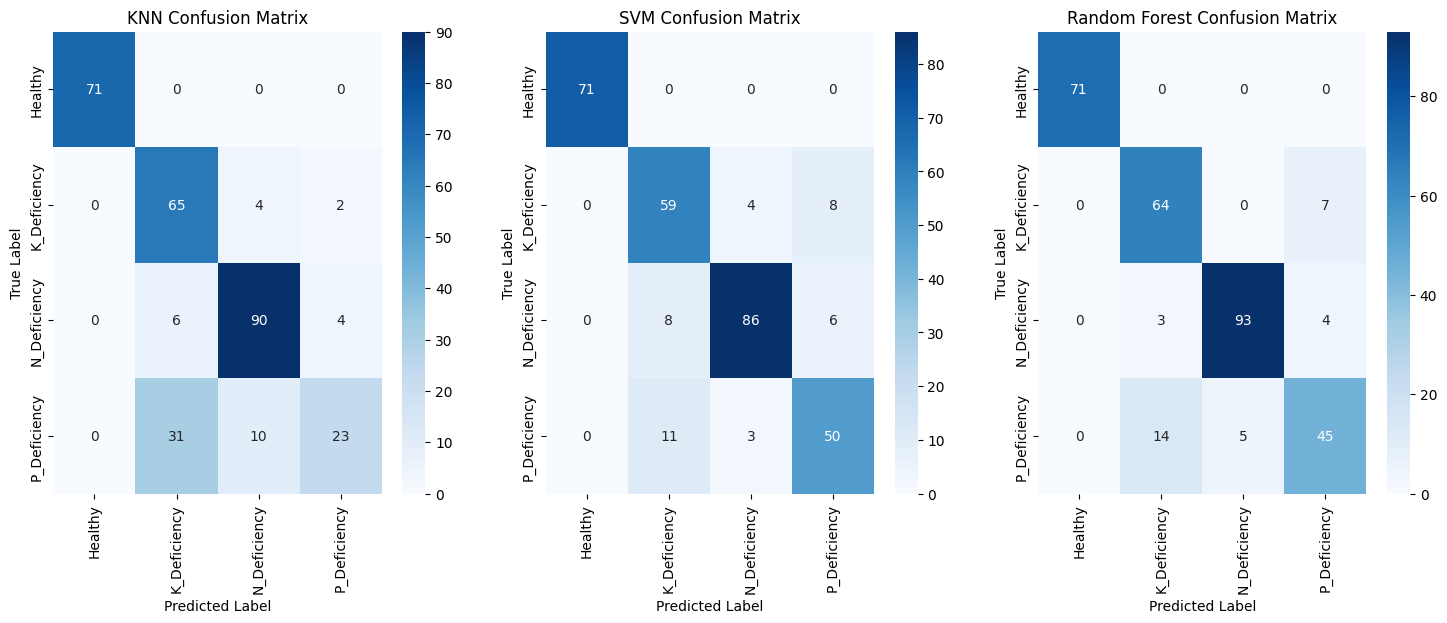

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes, ax=ax[0])
ax[0].set_title("KNN Confusion Matrix")
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")

sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes, ax=ax[1])
ax[1].set_title("SVM Confusion Matrix")
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes, ax=ax[2])
ax[2].set_title("Random Forest Confusion Matrix")
ax[2].set_xlabel("Predicted Label")
ax[2].set_ylabel("True Label")

plt.show()

In [ ]:
def detect_deficiency(img):
    img = img.resize((224, 224))
    img = np.array(img) / 255.0
    img_flat = img.reshape(1, -1)

    prediction_knn = knn_classifier.predict(img_flat)
    prediction_svm = svm_classifier.predict(img_flat)
    prediction_rf = rf_classifier.predict(img_flat)

    return {
        'KNN': classes[prediction_knn[0]],
        'SVM': classes[prediction_svm[0]],
        'Random Forest': classes[prediction_rf[0]]
    }

In [ ]:
# uploaded image
from google.colab import files
uploaded = files.upload()

if uploaded:
    img_path = list(uploaded.keys())[0]
    img = Image.open(img_path)
    print(f'Predictions for uploaded image:')
    predictions = detect_deficiency(img)
    for classifier, result in predictions.items():
        print(f'{classifier}: {result}')
else:
    print('No image uploaded.')

Saving P_Def_314.jpg to P_Def_314.jpg
Predictions for uploaded image:
KNN: K_Deficiency
SVM: P_Deficiency
Random Forest: P_Deficiency
